# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Daniel 6841
# student 2: Nicole 8231
# student 3: Sivan 0086

## Part 2 - Initial Preparations 
You could add as many code cells as needed

## 2.1 - load phase 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV as GridSearch, KFold
from sklearn.naive_bayes import MultinomialNB as Mnb
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier as Gbc

In [3]:
import pandas as pd
train_set = pd.read_csv('titanic_train.csv')
test_set = pd.read_csv('titanic_test.csv')
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [4]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


## 2.2 - EDA (2 Vis And 2 Charts)

In [5]:
train_set.info()
print("\n")
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64 

In [6]:
def plot_hist_gender_survivors():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    genders = {'Female': 0, 'Male': 1}
    colors = {'survived': ["#76FF00", "#FF5100"], 'not_survived': ["#00AEFF", "#8900FF"]}

    #loop through the combinations of gender and survived status
    for ax, (title, sex) in zip(axes, genders.items()):
        for status, color in colors.items():
            ages = train_set[(train_set['Sex'] == sex) & (train_set['Survived'] == (status == 'survived'))].Age
            sns.histplot(ages, bins=10, label=status, ax=ax, kde=False, color=color[sex])
            
        ax.grid()
        ax.legend()
        ax.set_title(title)

    plt.show()

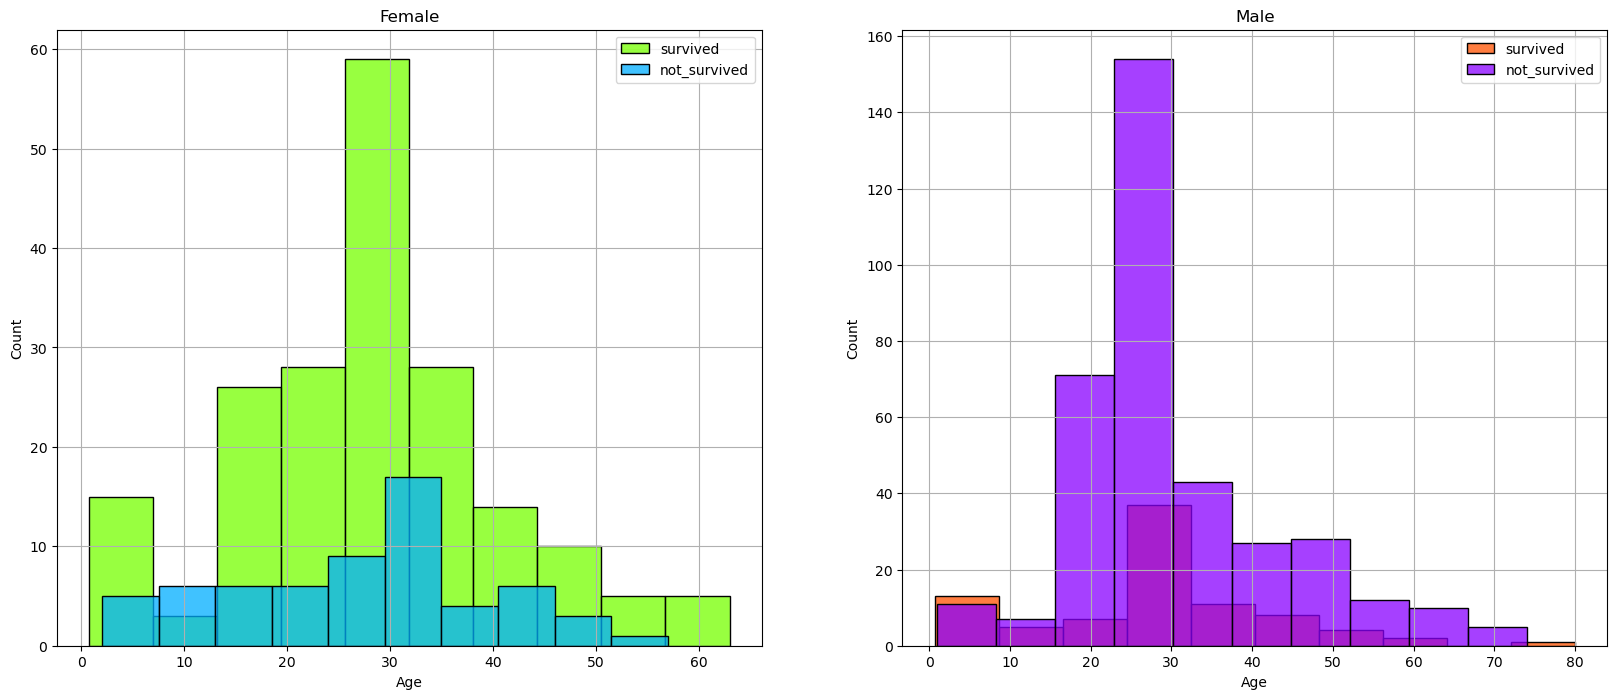

In [7]:
plot_hist_gender_survivors()

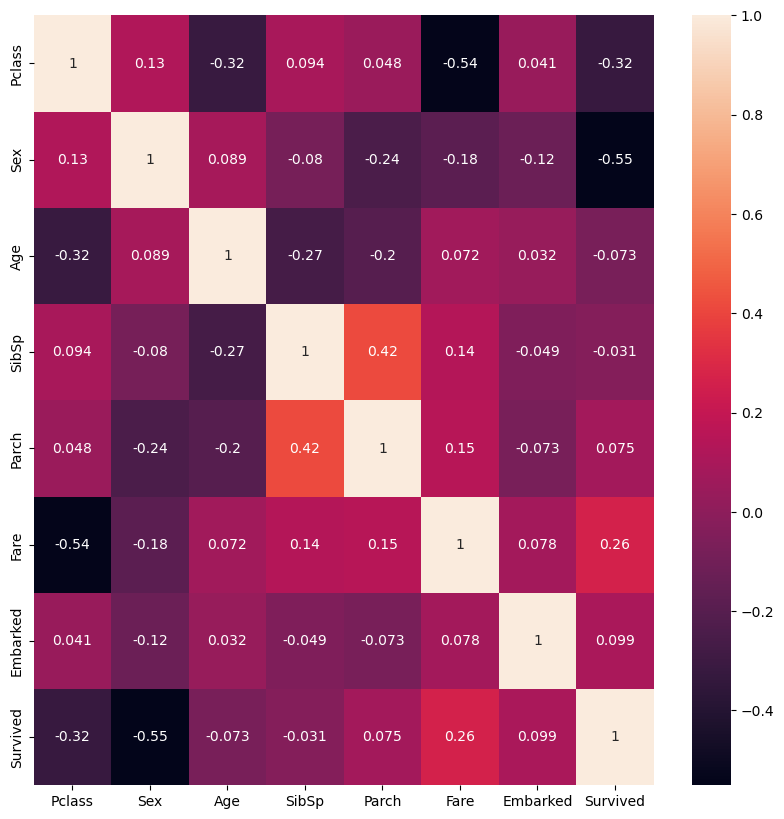

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(train_set.corr(), annot = True)
plt.show()

In [9]:
train_set.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [10]:
test_set.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.363128,0.675978,30.366983,0.502793,0.368715,31.507239,0.351955,0.340782
std,0.812116,0.469321,12.246691,1.278053,0.819923,49.254330,0.639640,0.475302
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,12.000000,0.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,27.825000,1.000000,1.000000
max,3.000000,1.000000,71.000000,8.000000,5.000000,263.000000,3.000000,1.000000


## Part 3 - Experiments
You could add as many code cells as needed

## 3.1 - Feature Engineering
* Lets Start With Naive Bayes

In [11]:
pipeNB = Pipeline([
    #We Will Try 3 Feature engineering techniques For Naive Bayes
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    #And this is Naive Bayes model
    ('NaiveBayes', Mnb())
])

* Now Lets Add One For KNN Too

In [12]:
pipeKNN = Pipeline([
    #We Will Try 3 Feature engineering techniques For KNN
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('StandardScaler', StandardScaler()),
    #And This is KNN model
    ('KNN', KNN())
])

* Using gradient boosting (Algrotem we didnt learned in class)

In [13]:
pipeGB = Pipeline([
    #We Will Try 3 Feature engineering techniques For Gradient Boosting
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    #And This is gradient boosting model
    ('Gbc', Gbc())
])

## 3.2 - Hyper Parameters
* First with Naive Bayes and then KNN:

In [14]:
paramsNB = {
    'NaiveBayes__alpha':  [0.002, 0.1, 0.5,0.9, 1.0, 2.0, 5.0, 10.0],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.01, 0.1, 0.2, 0.4, 0.5, 1e-2, 1e-1, 1, 10, 100],
    'NaiveBayes__force_alpha': [True, False],
    'NaiveBayes__fit_prior': [True, False]
}

In [15]:
paramsKNN = {
    'KNN__n_neighbors':  range(1,14),
    'varianceThreshold__threshold': [0.0001, 0.01, 0.1, 0.2, 0.4, 0.5],
    'KBest__k': ['all'],
    'KNN__metric' : ['manhattan', 'euclidean',"minkowski"]
}

In [16]:
paramsGb = {
    'Gbc__n_estimators' : [150, 400],
    'Gbc__learning_rate' : [0.09, 0.01, 0.2],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.001,0.01]
}

## 3.3 - Cross Validition 
* Naive Bayes and then KNN and Gradient Boosting as a model we didn't learned

In [17]:
# Create a Mold for Naive Bayes model
splitsNB = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
# Create a Mold for KNN model
splitsKNN = KFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
# Create a Mold for GB model
splitsGB = KFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
gridSearchKNN = GridSearch(pipeKNN, paramsKNN, scoring='f1', cv=splitsKNN)
gridSearchKNN.fit(train_set.drop("Survived", axis = 1), train_set["Survived"])

best_model_KNN = gridSearchKNN.best_estimator_
best_score_KNN = gridSearchKNN.best_score_
best_params_KNN = gridSearchKNN.best_params_

print("F1 best permutation score is: " ,best_score_KNN)

F1 best permutation score is:  0.749094017094017


In [21]:
gridSearchNB = GridSearch(pipeNB,paramsNB, scoring='f1', cv=splitsNB)
gridSearchNB.fit(train_set.drop("Survived", axis=1), train_set["Survived"])

best_model_NB = gridSearchNB.best_estimator_
best_score_NB = gridSearchNB.best_score_
best_params_NB = gridSearchNB.best_params_

print("F1 best permutation score is: ", best_score_NB)


F1 best permutation score is:  0.6887981013917


In [22]:
gridSearchGbc = GridSearch(pipeGB, paramsGb, scoring='f1', cv=splitsGB)
gridSearchGbc.fit(train_set.drop("Survived", axis=1), train_set["Survived"])

best_model_gbc = gridSearchGbc.best_estimator_
best_score_gbc = gridSearchGbc.best_score_
best_params_gbc = gridSearchGbc.best_params_

print("F1 best permutation score is: ", best_score_gbc)

F1 best permutation score is:  0.7562957524040457


In [23]:
comparison_dictionary = {
    'KNN' : best_params_KNN,
    'Naive Bayes' : best_params_NB,
    'Gradient Boosting' : best_params_gbc

}
compare_df = pd.DataFrame(comparison_dictionary)
compare_df.fillna("-", inplace = True)
compare_df = compare_df.T
compare_df["F1"] = [best_score_KNN, best_score_NB,best_score_gbc]
compare_df.sort_values(by = ["F1"], inplace = True, ascending = False)
compare_df

,KBest__k,KNN__metric,KNN__n_neighbors,varianceThreshold__threshold,NaiveBayes__alpha,NaiveBayes__fit_prior,NaiveBayes__force_alpha,Gbc__learning_rate,Gbc__n_estimators,F1
Gradient Boosting,all,-,-,0.001,-,-,-,0.09,150,0.756296
KNN,all,manhattan,13,0.0001,-,-,-,-,-,0.749094
Naive Bayes,all,-,-,0.01,0.5,False,True,-,-,0.688798


# Best Model 
* We will Choose Gradient Boosting as our clasification model for our next step

* Those are the best combination of hyper parameters

In [24]:
the_Best_Model = best_model_gbc
best_model_gbc

Pipeline(steps=[('varianceThreshold', VarianceThreshold(threshold=0.001)),
                ('KBest', SelectKBest(k='all')),
                ('MinMaxScaler', MinMaxScaler()),
                ('Gbc',
                 GradientBoostingClassifier(learning_rate=0.09,
                                            n_estimators=150))])

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [25]:
the_Best_Model.fit(train_set.drop("Survived", axis = 1), train_set["Survived"])
y_predict = the_Best_Model.predict(test_set.drop("Survived", axis = 1))

## Part 5 - Apply on test and show model performance estimation

In [26]:
pred_df = test_set.copy()
pred_df["Survived Prediction"] = y_predict
pred_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Survived Prediction
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


In [27]:
confusionM = confusion_matrix(test_set["Survived"], y_predict)
the_Best_F1 = f1_score(test_set["Survived"], y_predict)

confusionM_df = pd.DataFrame(confusionM)
confusionM_df.index = confusionM_df.columns = ["True", "False"]
print("Confusion Matrix for Selected Model, F1 score of: ", the_Best_F1)
confusionM_df

Confusion Matrix for Selected Model, F1 score of:  0.8245614035087719


,True,False
True,112,6
False,14,47


In [28]:
report = classification_report(test_set["Survived"], y_predict,output_dict=True)
df_report=pd.DataFrame(report)
df_report.transpose()

,precision,recall,f1-score,support
0,0.888889,0.949153,0.918033,118.000000
1,0.886792,0.770492,0.824561,61.000000
accuracy,0.888268,0.888268,0.888268,0.888268
macro avg,0.887841,0.859822,0.871297,179.000000
weighted avg,0.888174,0.888268,0.886179,179.000000
